In [5]:
pip install numpy

In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [11]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.isnull().sum().sum()

0

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [19]:
df["customerID"].duplicated().sum()

0

In [21]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

#conerted 0 and 1 values of senior citizen to yes/no to make it easier to understand 

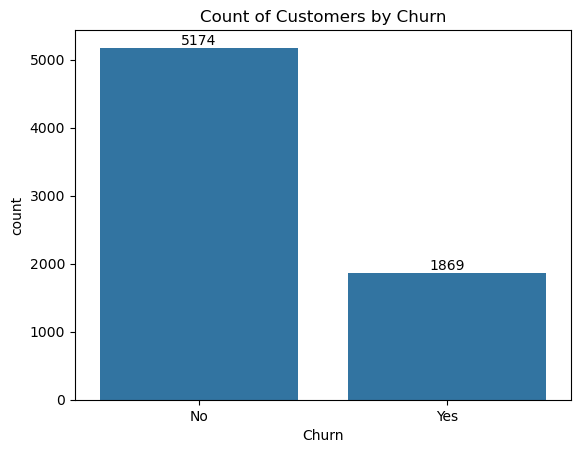

In [23]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

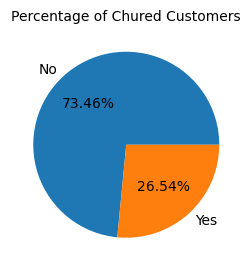

In [25]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Chured Customers", fontsize = 10)
plt.show()

In [ ]:
#from the given pie chart we can conclude that 26.54% od our customers have churned out #now let's exlore the reson behind it

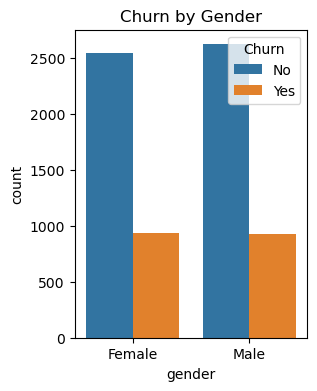

In [27]:
plt.figure(figsize = (3,4))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

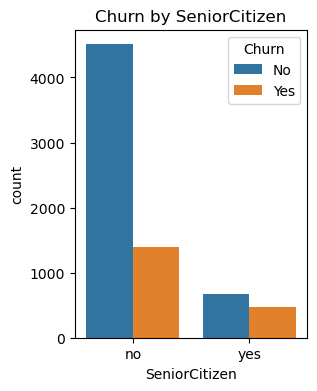

In [29]:
plt.figure(figsize = (3,4))
sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

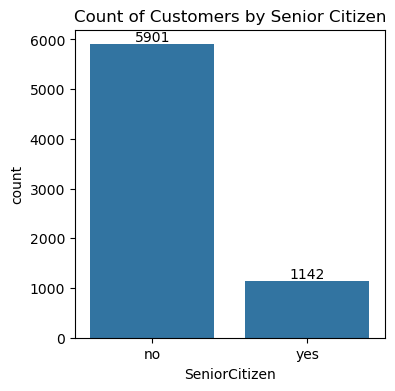

In [31]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

In [ ]:
#Comparative a greater percentage of people in senior citizen category have churned 

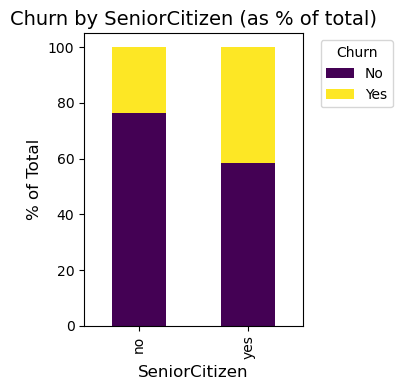

In [33]:
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
percentages.plot(kind='bar', stacked=True, figsize=(4, 4), colormap='viridis')

# Add labels and title
plt.title('Churn by SeniorCitizen (as % of total)', fontsize=14)
plt.xlabel('SeniorCitizen', fontsize=12)
plt.ylabel('% of Total', fontsize=12)
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

#Comparative a greater percentage of people in senior citizen have churned

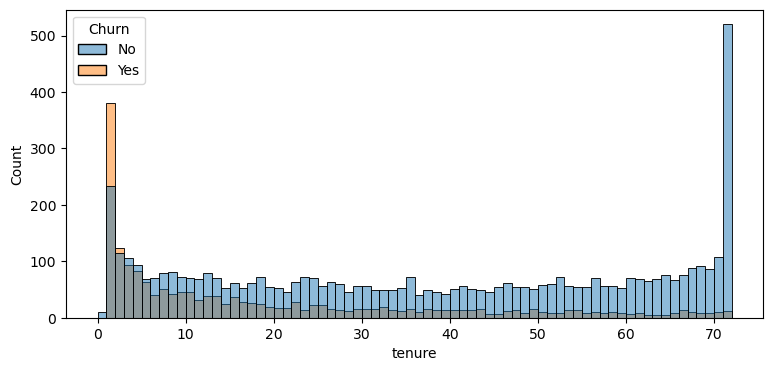

In [37]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

In [ ]:
#People who have used our services for a long time have stayed and people who have used our services or 1 or 2 month have chured

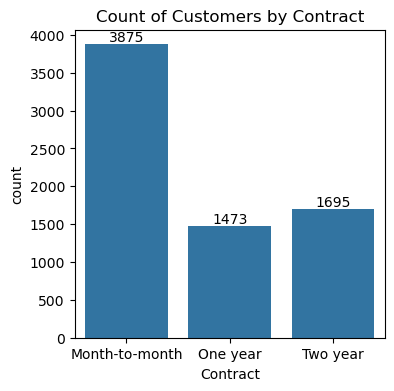

In [39]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

In [ ]:
#People who have month to month contract are kikely to churn then from those who have 1 or 2 years of contract

In [41]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

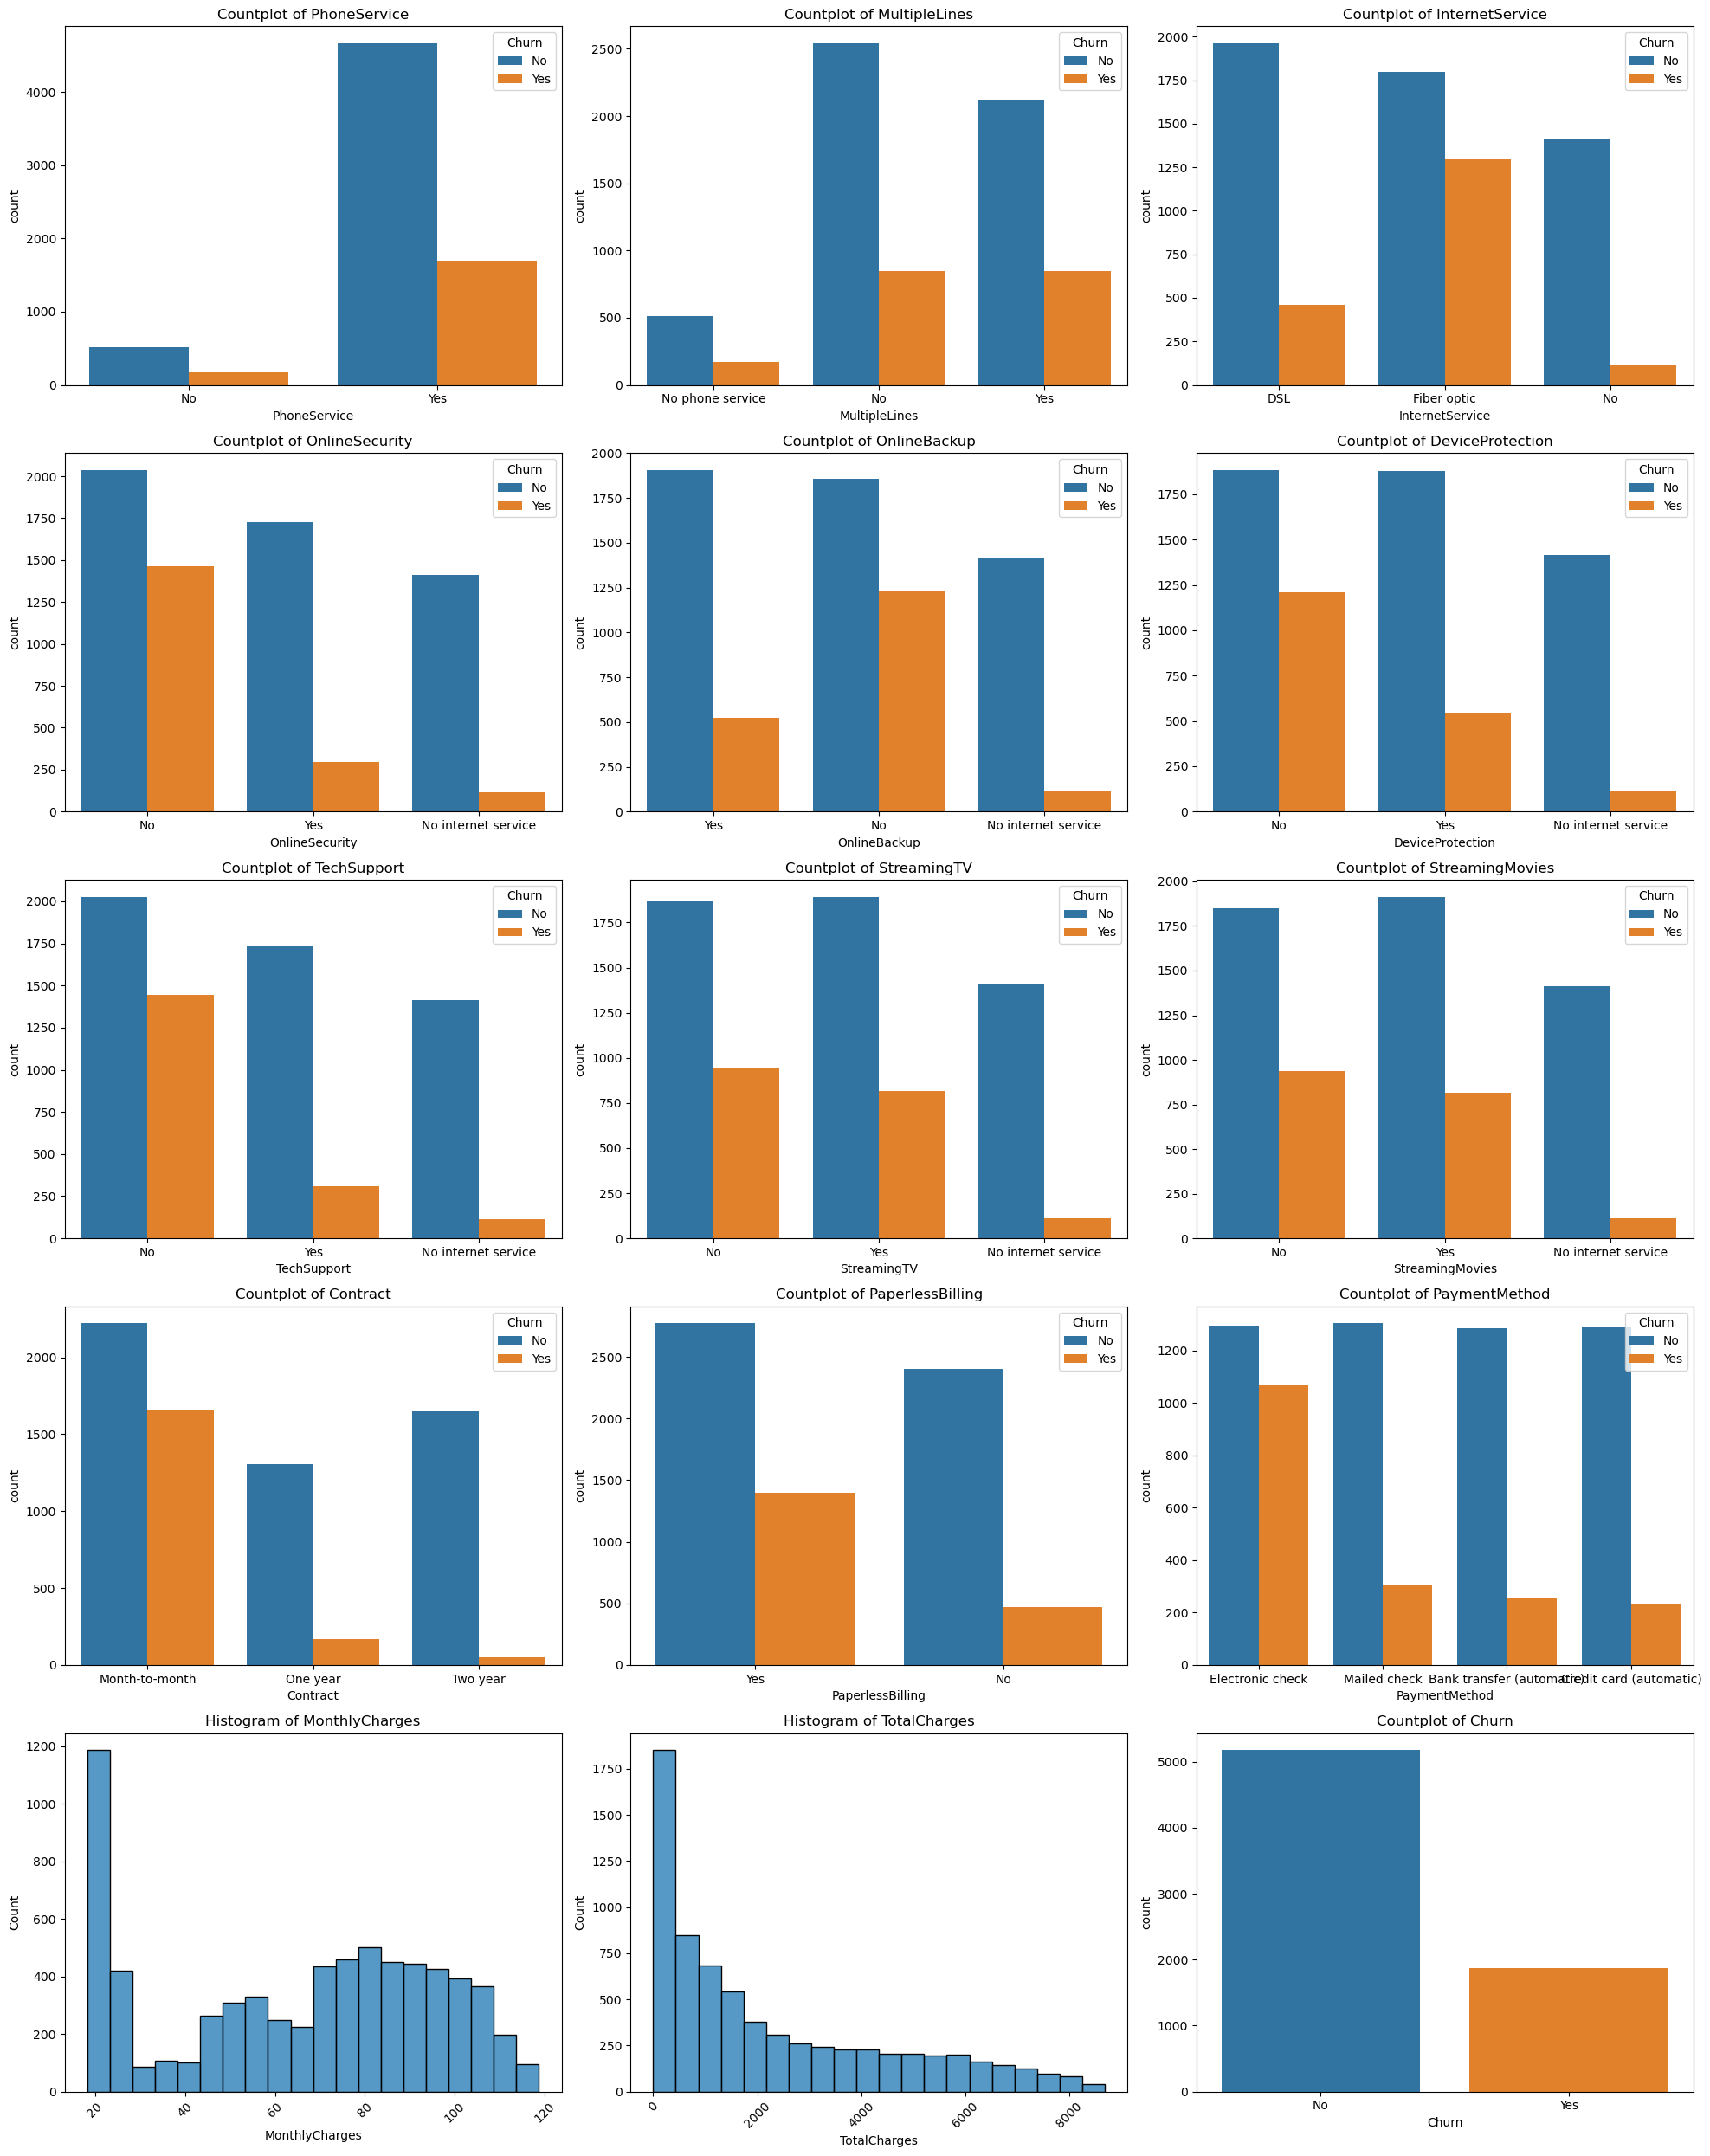

In [73]:
# Assuming 'df' is your DataFrame with the listed columns
columns = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 
    'MonthlyCharges', 'TotalCharges', 'Churn'
]

# Setting up the subplots
n_cols = 3  # Number of plots per row
n_rows = -(-len(columns) // n_cols)  # Calculate rows needed (ceiling division)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plotting countplots
for i, col in enumerate(columns):
    if df[col].dtype == 'object' or len(df[col].unique()) < 20: # Categorical or few unique values
        sns.countplot(data=df, x=col, ax=axes[i], hue = df["Churn"])
        axes[i].set_title(f'Countplot of {col}')
        axes[i].tick_params(axis='x', rotation=0)  # Rotate x-axis labels if needed
    else:
        sns.histplot(data=df, x=col, ax=axes[i], kde=False, bins=20)
        axes[i].set_title(f'Histogram of {col}')
        axes[i].tick_params(axis='x', rotation=45)
        
# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#The visualizations show the distribution of customer characteristics across various categories, such as services, 
billing methods, and contract types. Most categorical features 
like 'InternetService,' 'PaymentMethod,' and 'Contract' have clear dominant categories. 
Numeric columns such as 'MonthlyCharges' and 'TotalCharges' exhibit a right-skewed distribution. 
The 'Churn' column indicates a significant imbalance, with fewer customers churning compared to those retained.

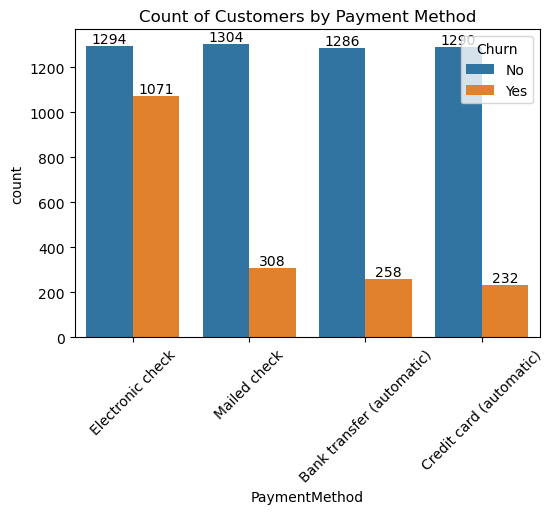

In [75]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

#Customer is likely to churn when he is using electronic check as a payment method